In [2]:
!pip install -q osmnx geopandas seaborn matplotlib


In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

%matplotlib inline

In [10]:
# select a city and crs
cityname = 'Milan, Italy'
crs = 'EPSG:4326'

In [13]:
# graph by geocoding
graph = ox.graph_from_place(cityname, network_type='walk')

# project graph
graph = ox.project_graph(graph, to_crs=crs)

In [14]:
# Simplify to get real intersections only
# (consolidate nodes within a distance from eachother)
graph_simplified = ox.simplification.consolidate_intersections(
    # Graph to simplify
    graph,
    # buffer around each node (project the graph beforehand)
    tolerance=5,
    # Get result as graph (False to get nodes only as gdf)
    rebuild_graph=True,
    # no dead ends
    dead_ends=False,
    # Reconnect (False to get intersections only)
    reconnect_edges=True
)

/opt/anaconda3/lib/python3.12/site-packages/osmnx/simplification.py:596: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged = gdf_nodes.buffer(tolerance).union_all()
/opt/anaconda3/lib/python3.12/site-packages/osmnx/simplification.py:655: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = node_clusters.centroid


In [15]:
# everything to gdfs
nodes, edges = ox.graph_to_gdfs(graph)
nodes_s, edges_s = ox.graph_to_gdfs(graph_simplified)

In [16]:
# everything to gdfs
nodes, edges = ox.graph_to_gdfs(graph)
nodes_s, edges_s = ox.graph_to_gdfs(graph_simplified)

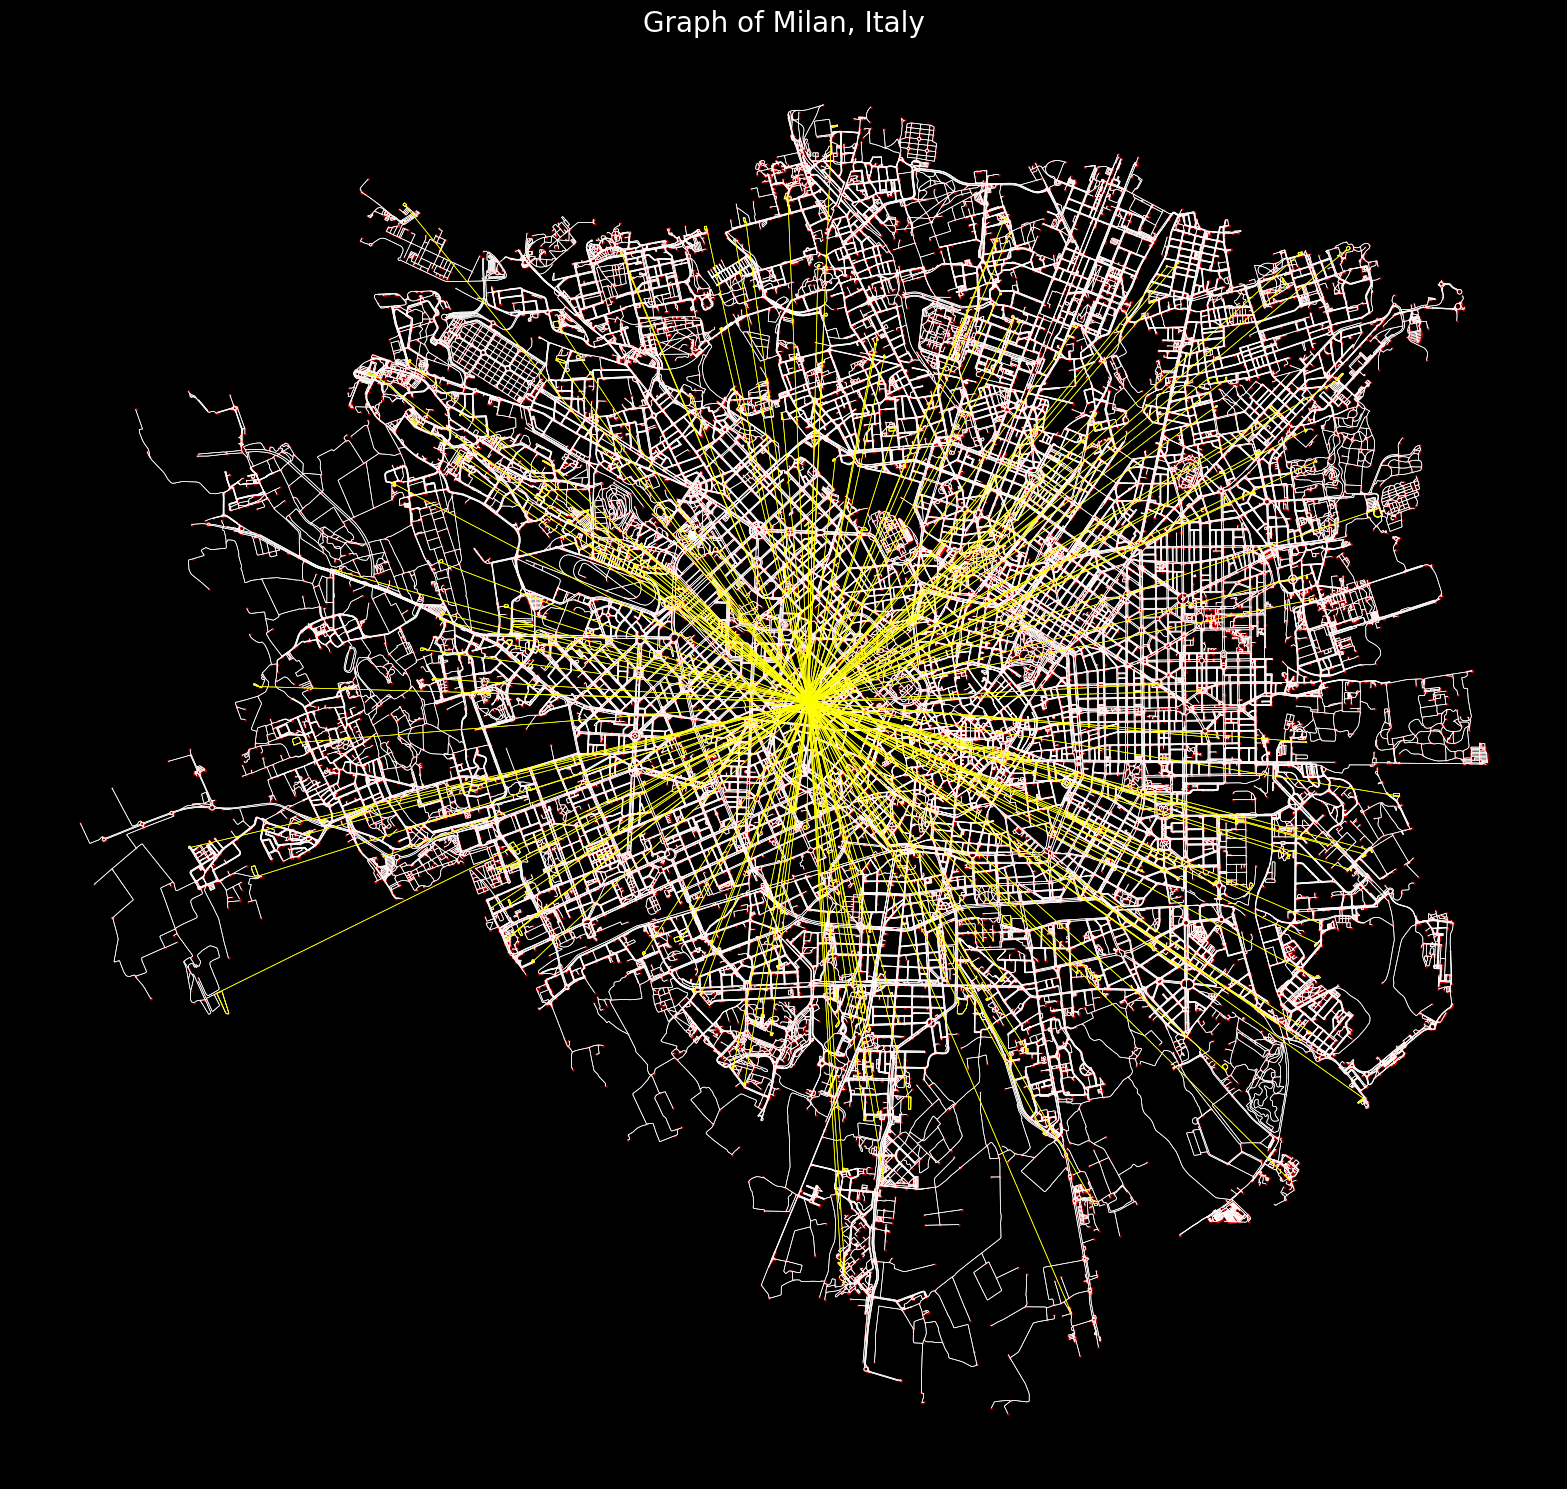

In [20]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_axis_off()
ax.set_aspect('equal')
fig.set_facecolor('black')
edges.plot(ax=ax, linewidth=0.5, color='white')
plt.title(f'Graph of {cityname}', fontsize=20, color='white')
nodes.plot(ax=ax, markersize=1, color='red', alpha=0.5)
edges_s.plot(ax=ax, linewidth=0.5, color='yellow')
nodes_s.plot(ax=ax, markersize=1, color='blue', alpha=0.5)

plt.tight_layout()

plt.savefig('milan_graph.png', dpi=300, bbox_inches='tight', facecolor='black')

plt.show()